In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np



# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False


In [2]:
blood = pd.read_csv('blood data/시·도별_인구대비_헌혈실적_2005_2019.csv',  encoding='CP949', header=None)
blood

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,시·도별(1),2005,2005,2005,2006,2006,2006,2007,2007,2007,...,2016,2017,2017,2017,2018,2018,2018,2019,2019,2019
1,시·도별(1),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),...,인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명),헌혈실적 (건),헌혈률 (%),인구수 (명)
2,합계,2274336,4.7,48138077,2302542,4.8,48297184,2087762,4.3,48456369,...,50801405,2928670,5.7,51446201,2883270,5.6,51635256,2791092,5.4,51849861
3,서울,760596,7.6,10011324,793327,7.9,10020123,747542,7.5,10025669,...,9834687,1015159,10.4,9776305,975868,10.0,9721190,900964,9.3,9729107
4,부산,214551,6.0,3586087,213811,6.0,3554003,190408,5.4,3525220,...,3388631,215280,6.3,3428923,223730,6.5,3418011,213597,6.3,3413841
5,대구경북,195029,3.8,5158051,190002,3.7,5132158,158320,3.1,5104874,...,5092303,240804,4.7,5146365,246175,4.8,5141620,232482,4.6,5103867
6,인천,132426,5.1,2578356,123896,4.8,2596317,113310,4.3,2612866,...,2914455,163724,5.6,2923047,157493,5.4,2942005,158557,5.4,2957026
7,경기,139991,1.3,10612455,143177,1.3,10822060,130461,1.2,11039291,...,12519009,211129,1.6,12809379,204183,1.6,12955219,211443,1.6,13239666
8,강원,84507,5.7,1488365,77459,5.2,1479284,65018,4.4,1470447,...,1511017,154964,10.2,1520785,161359,10.6,1524406,153606,10.0,1541502
9,충북,77356,5.2,1484191,79003,5.3,1484406,72803,4.9,1483401,...,1566690,95644,6.0,1605139,93808,5.8,1612881,94251,5.9,1600007


In [45]:
blood_local = blood.T

# 2008년 이전 데이터 날리기
drop_idx = blood_local[blood_local[0].str.contains('2005|2006|2007')].index
drop_idx
blood_local = blood_local.drop(index= drop_idx)

# 지역별 실적만 가져오기
blood_local2 = blood_local[blood_local[1].str.contains('실적|시')]


# 시각화에 필요없는 값들 제거
blood_local3 = blood_local2.drop(columns=[1,2])
# 시각화를 위해 데이터 형변환
blood_local4 = blood_local3.T.set_index(0)
blood_local4 = blood_local4.astype(int)



In [46]:
column = []
for i in blood_local4.T['시·도별(1)']:
    column.append(i)

column

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [47]:
# 데이터를 시각화하기 좋은 형태로 변형
blood_local4.columns= column
blood_local5 = blood_local4.drop(index='시·도별(1)')
blood_local5

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,,,,,,,,,,,,
서울,838492,924605,954551,918763,964923,1036438,1085001,1062324,1008947,1015159,975868,900964
부산,210650,217109,233701,217110,218927,230966,235854,238050,205028,215280,223730,213597
대구경북,188625,216160,213828,212001,227200,244949,263853,260314,236917,240804,246175,232482
인천,124019,132576,154954,175120,173630,178018,185952,181013,161924,163724,157493,158557
경기,142566,165455,171747,176920,175999,191485,206531,218945,205846,211129,204183,211443
강원,73491,80058,83792,92295,108305,120455,128006,149795,149851,154964,161359,153606
충북,84955,99447,101209,91354,100097,98145,100191,99627,89342,95644,93808,94251
대전세종충남,175573,185884,194976,192337,208438,226335,234571,251975,239081,242643,249417,249947
전북,107833,121245,124784,125506,127924,131428,125427,128878,116117,114233,108594,108908


In [60]:
blood_local5.index

Index(['서울', '부산', '대구경북', '인천', '경기', '강원', '충북', '대전세종충남', '전북', '광주전남',
       '경남', '울산', '제주'],
      dtype='object', name=0)

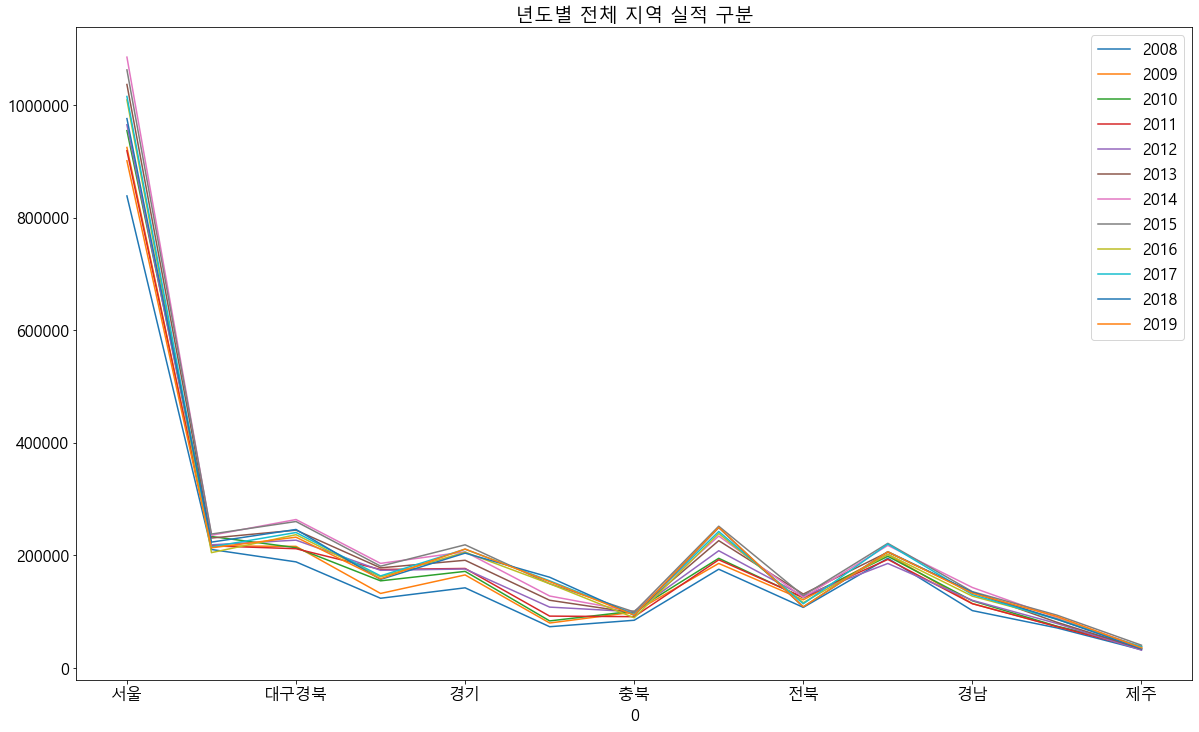

In [70]:
# 데이터 지역별  시각화
blood_local5.plot(figsize=[20,12])
plt.title('년도별 전체 지역 실적 구분')
plt.show()

일단 서울이 다른 곳에 비해 항상 압도적으로 많은 헌혈실적을 가지고 있음

## 지역별로 구분해서 보자

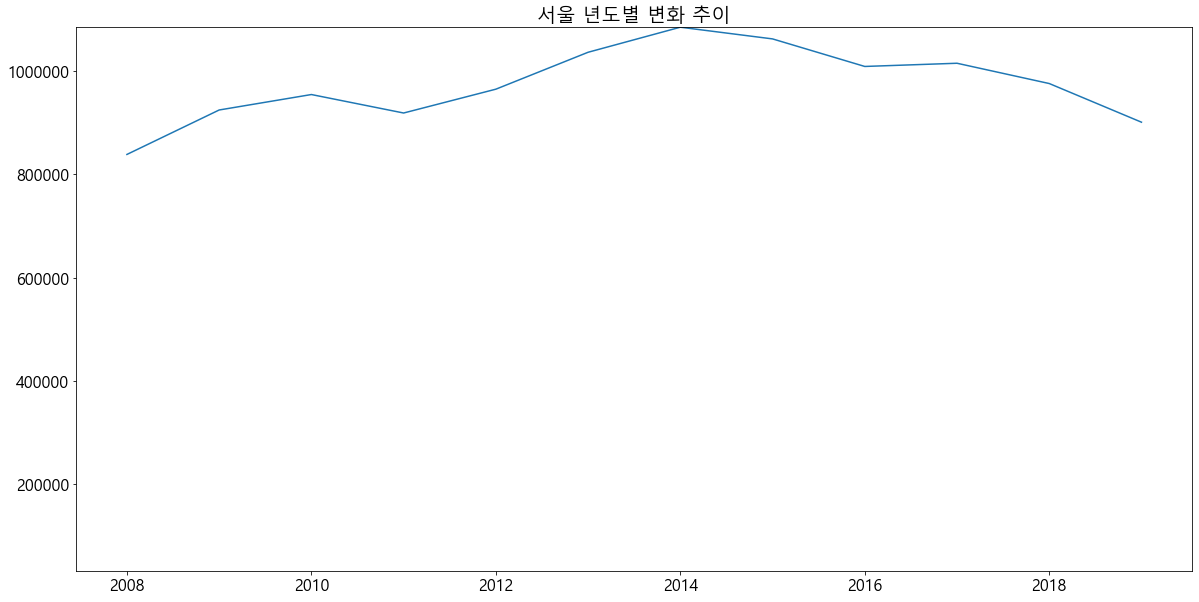

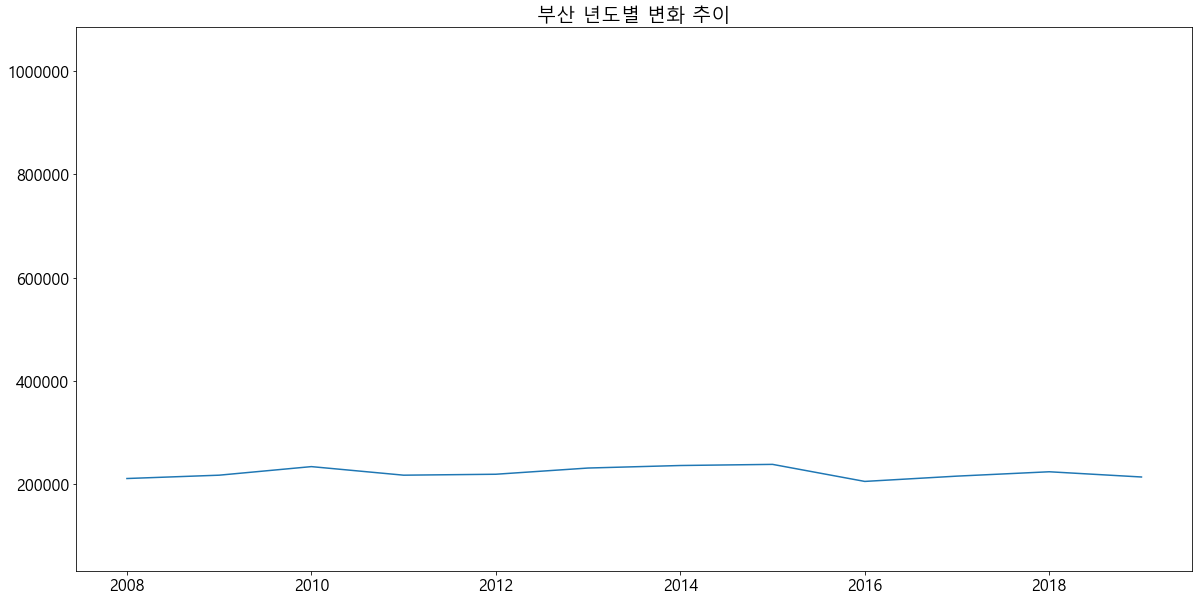

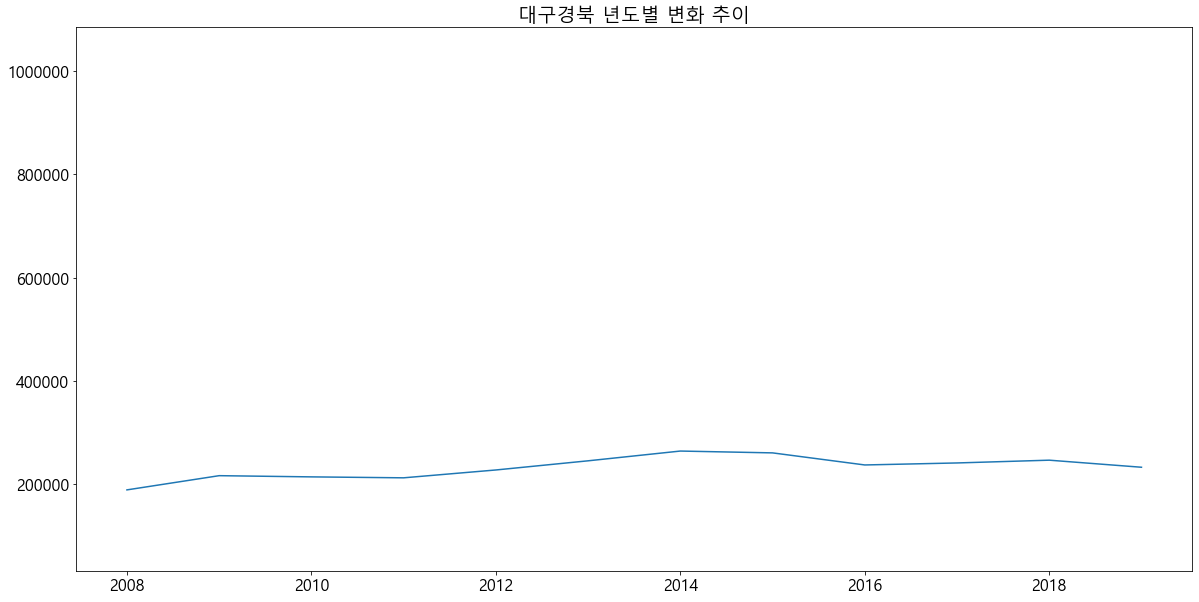

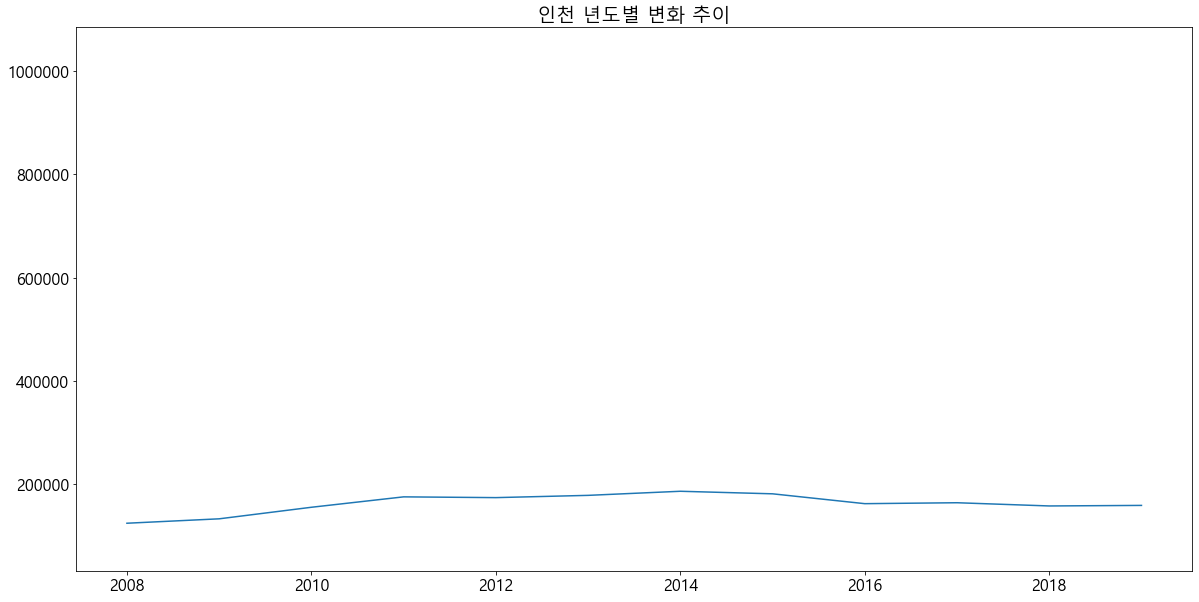

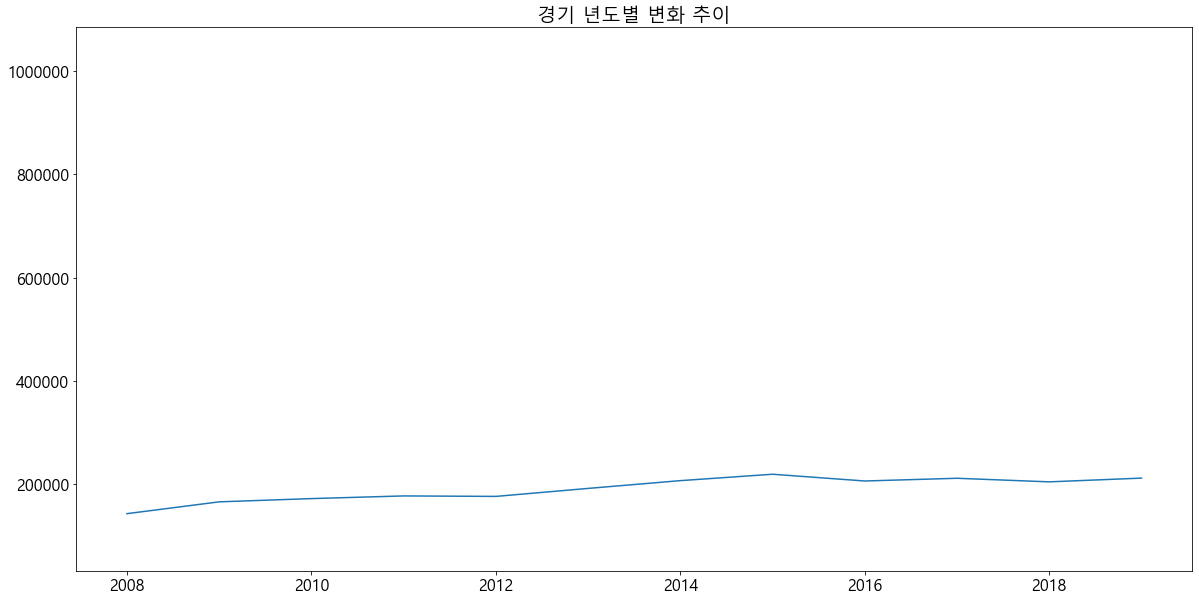

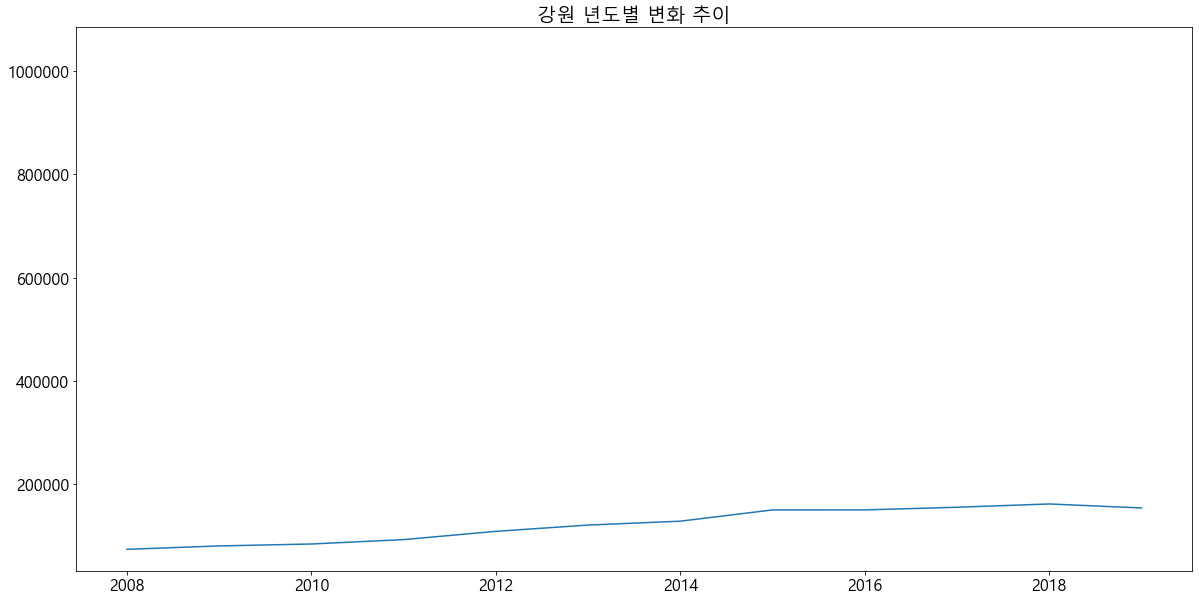

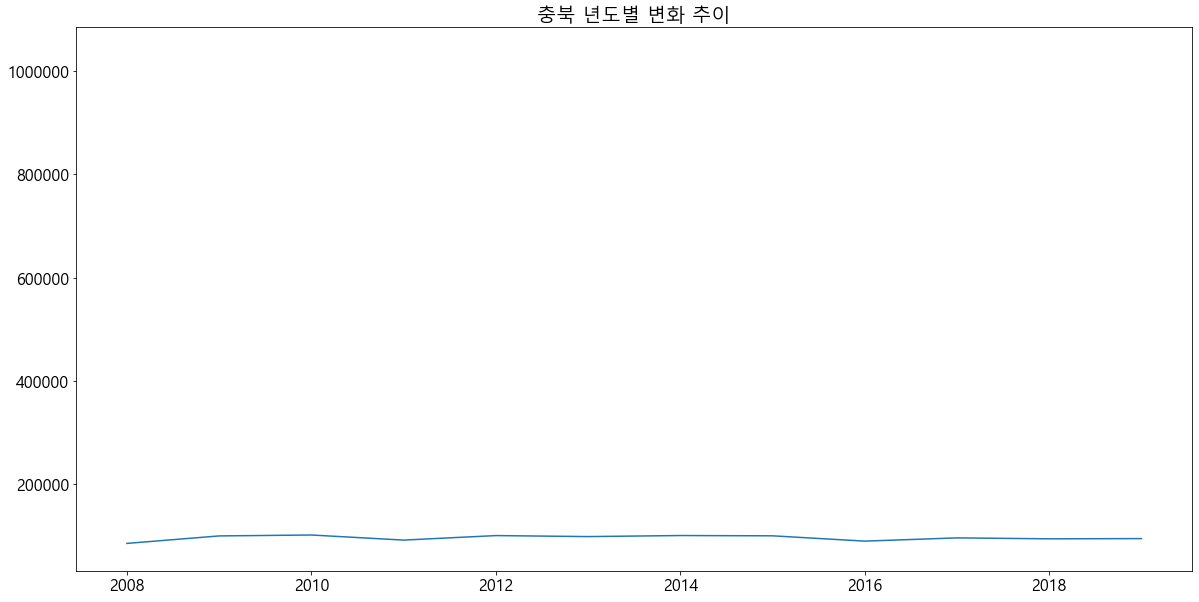

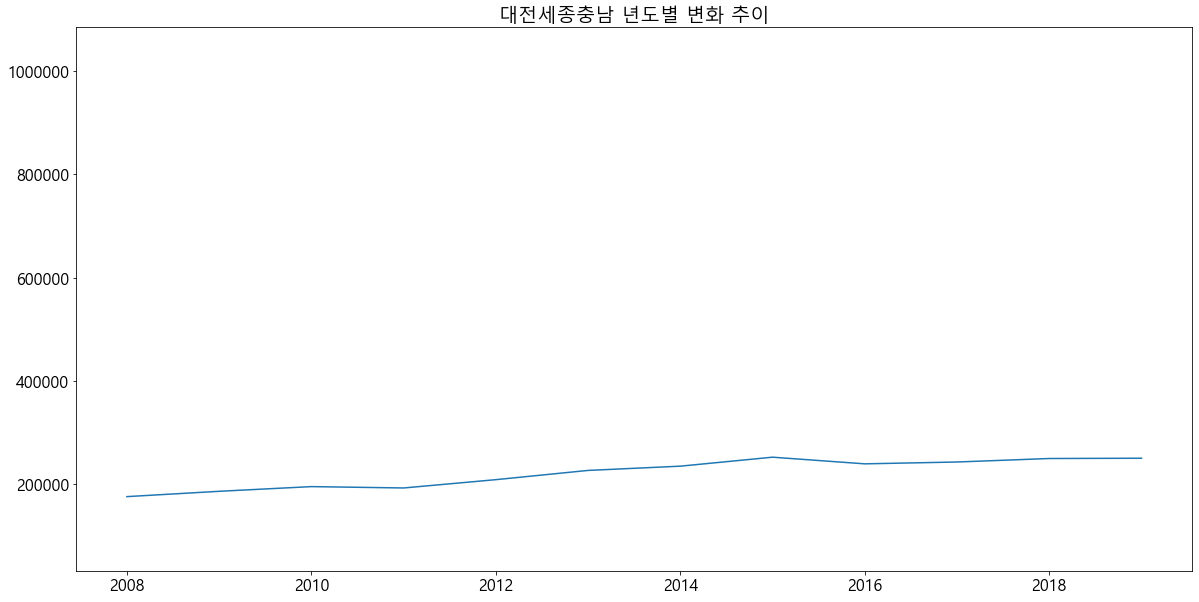

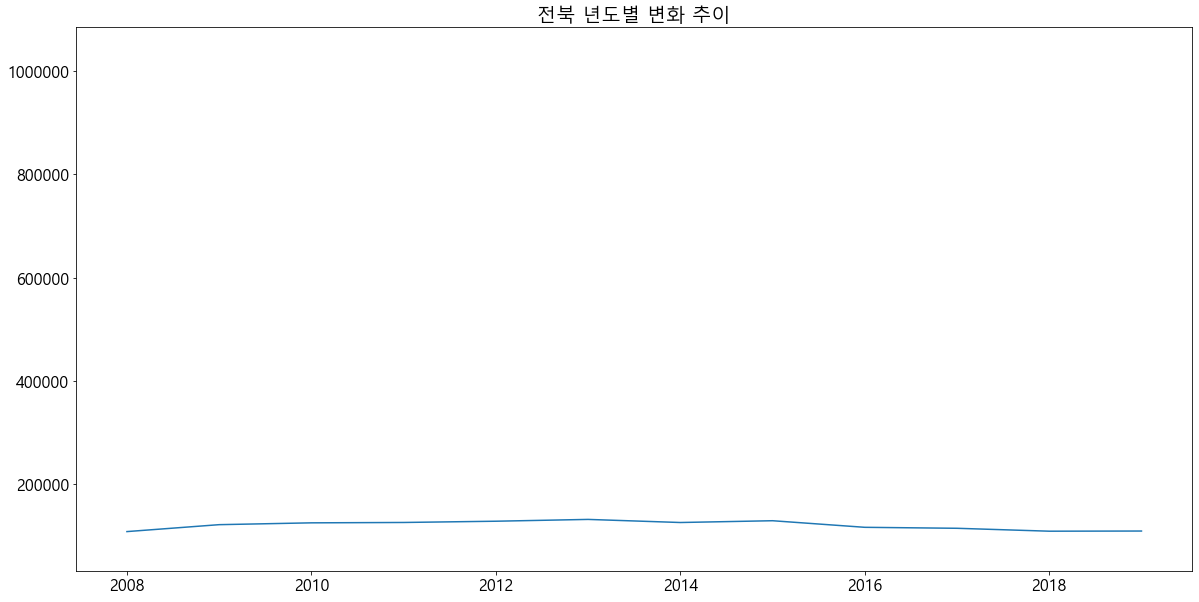

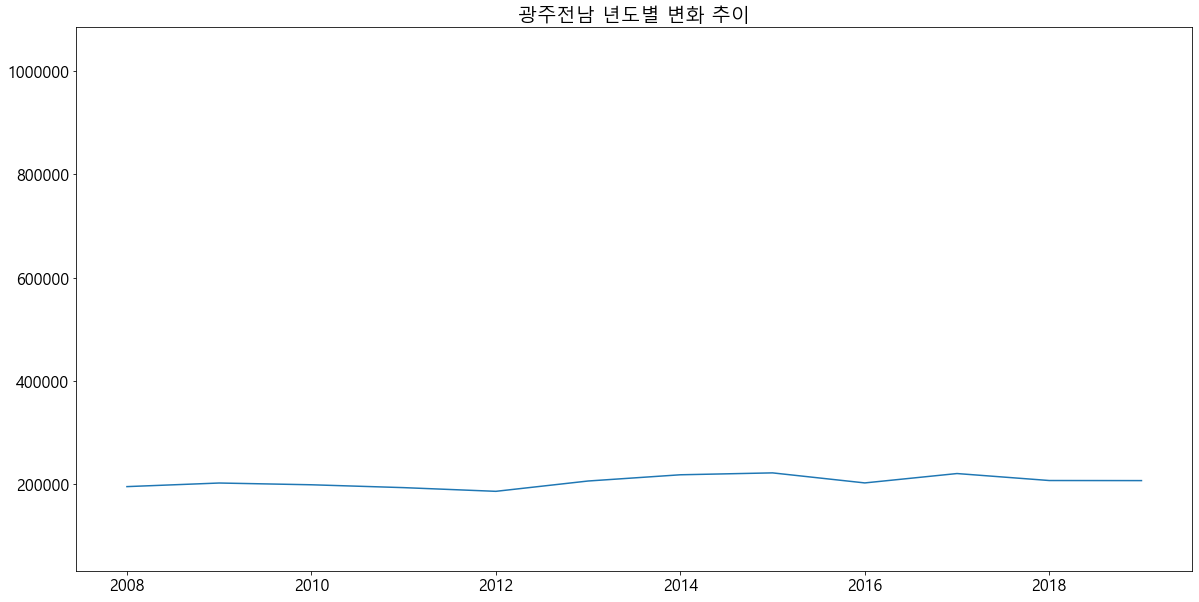

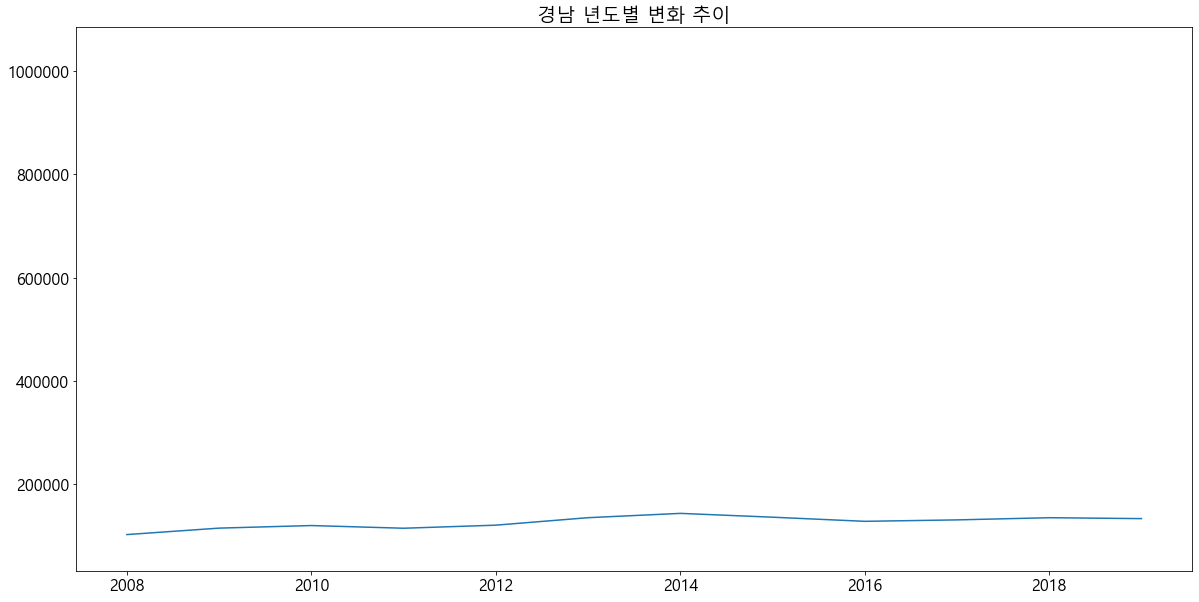

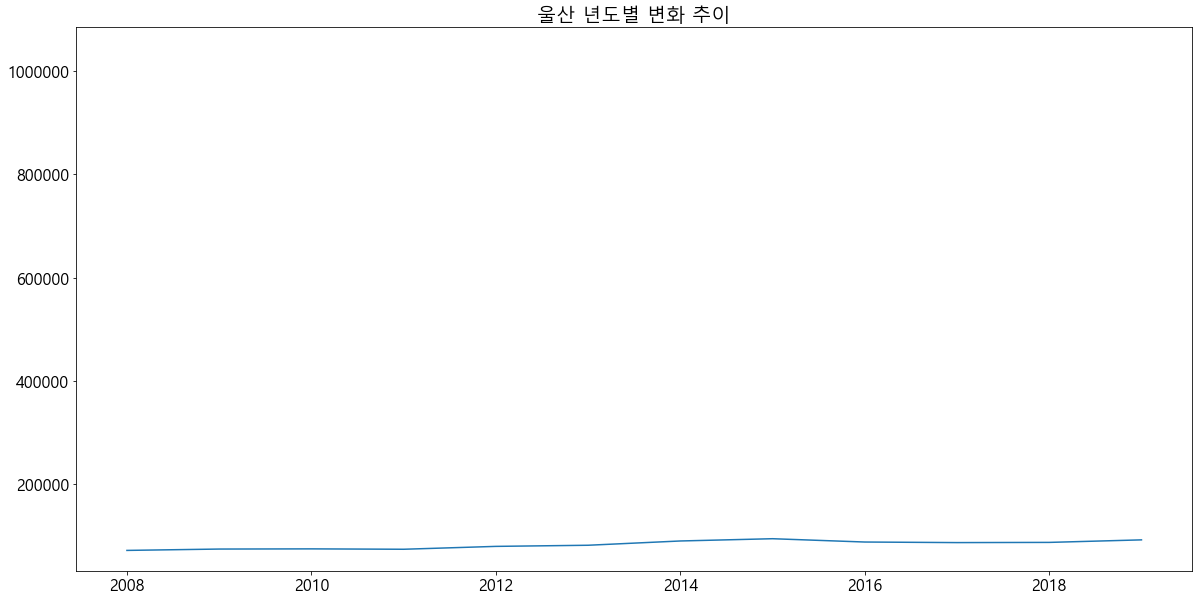

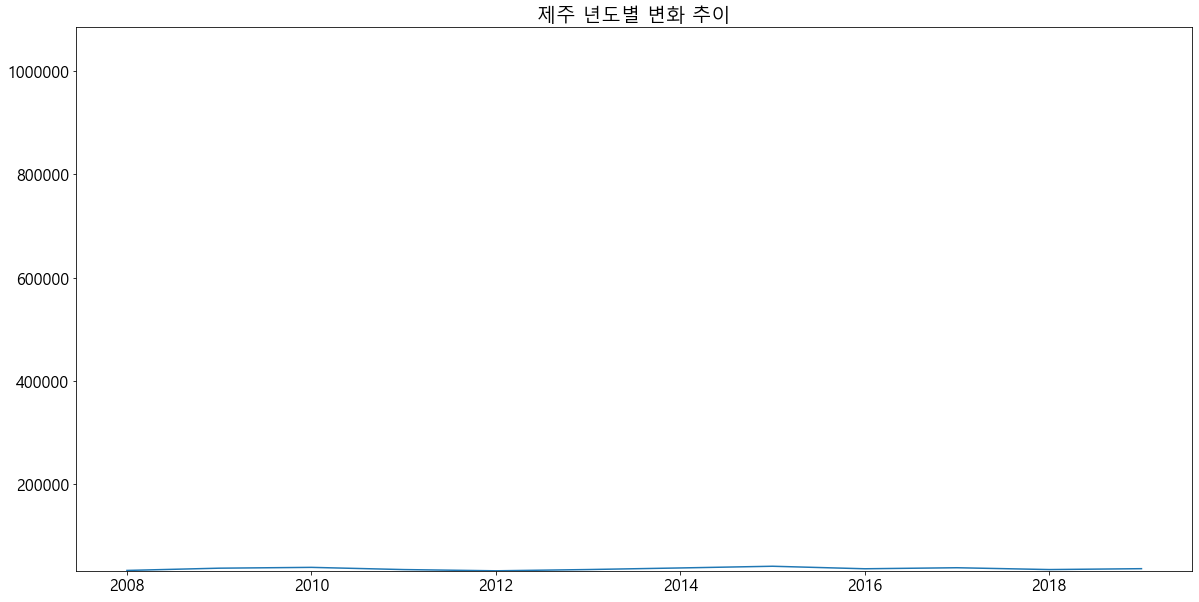

In [85]:
ylim_min = blood_local5.min().min()
ylim_max = blood_local5.max().max()

for i in blood_local5.index:
    blood_local5.T[f'{i}'].plot()
    plt.title(f'{i} 년도별 변화 추이')
    plt.ylim(ylim_min,ylim_max)
    plt.show()

서울이 너무 높으니까 다른데이터 끼리만 비교해보자

In [89]:
blood_local6 = blood_local5[1:]

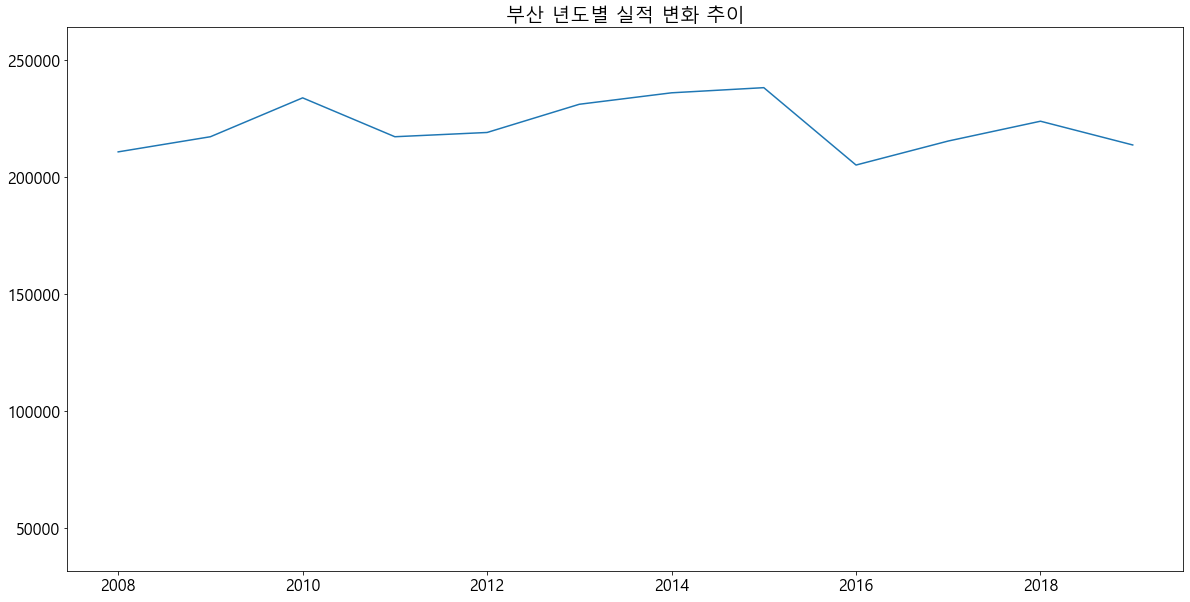

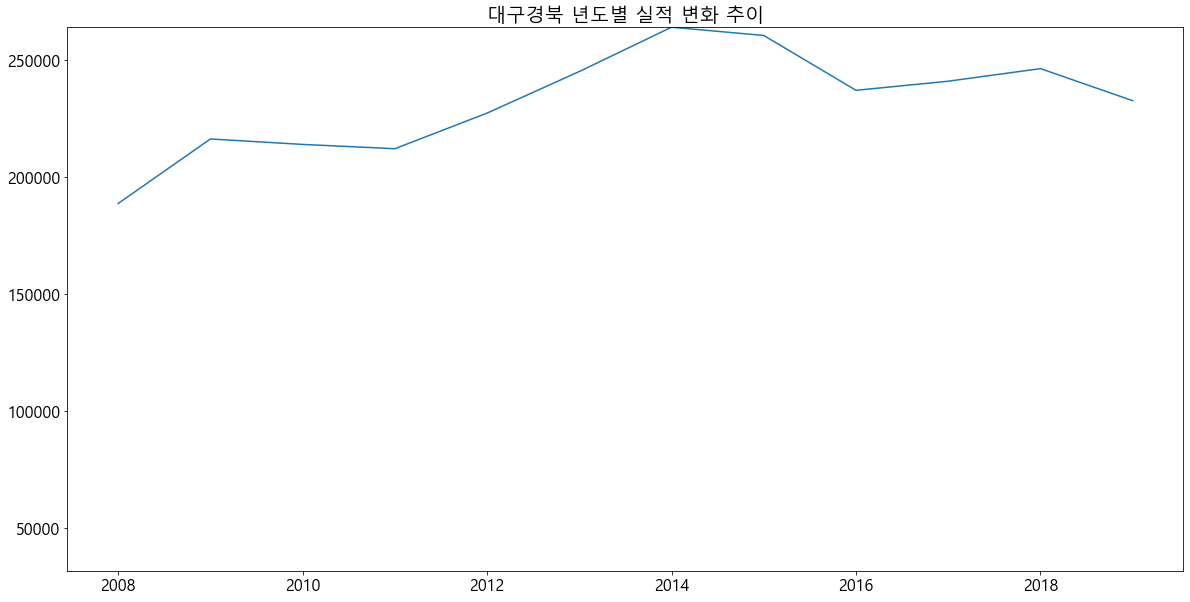

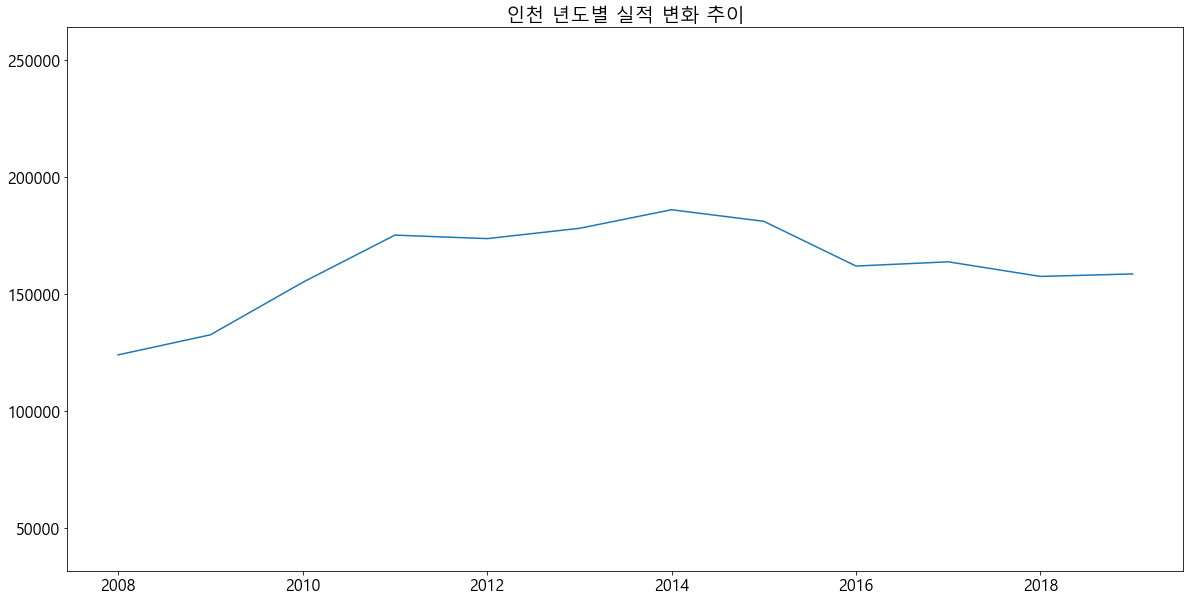

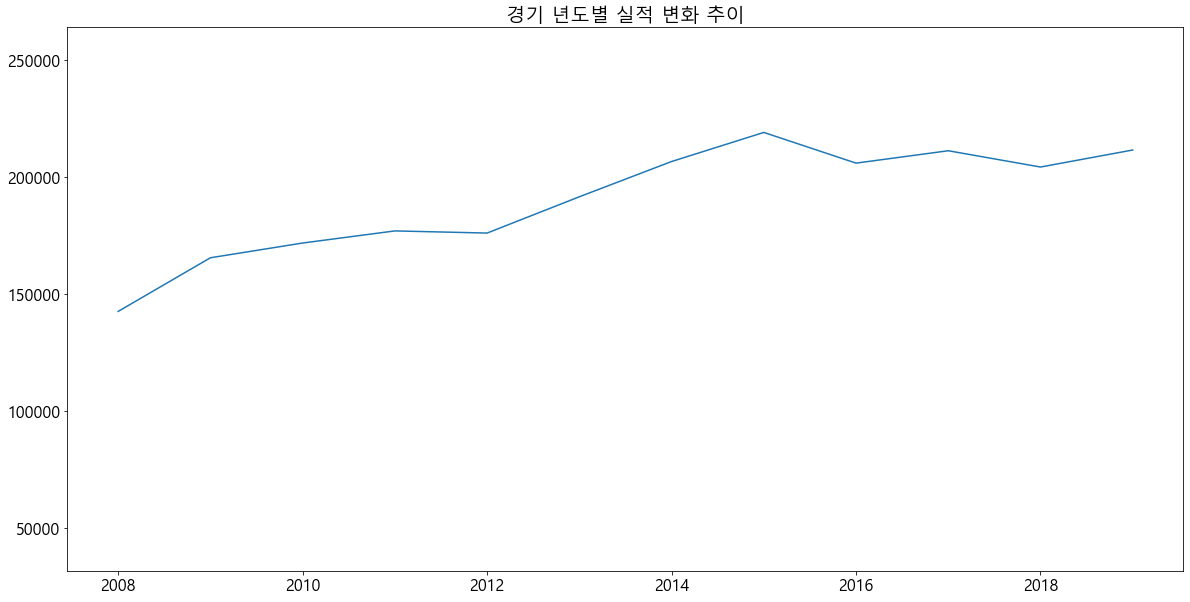

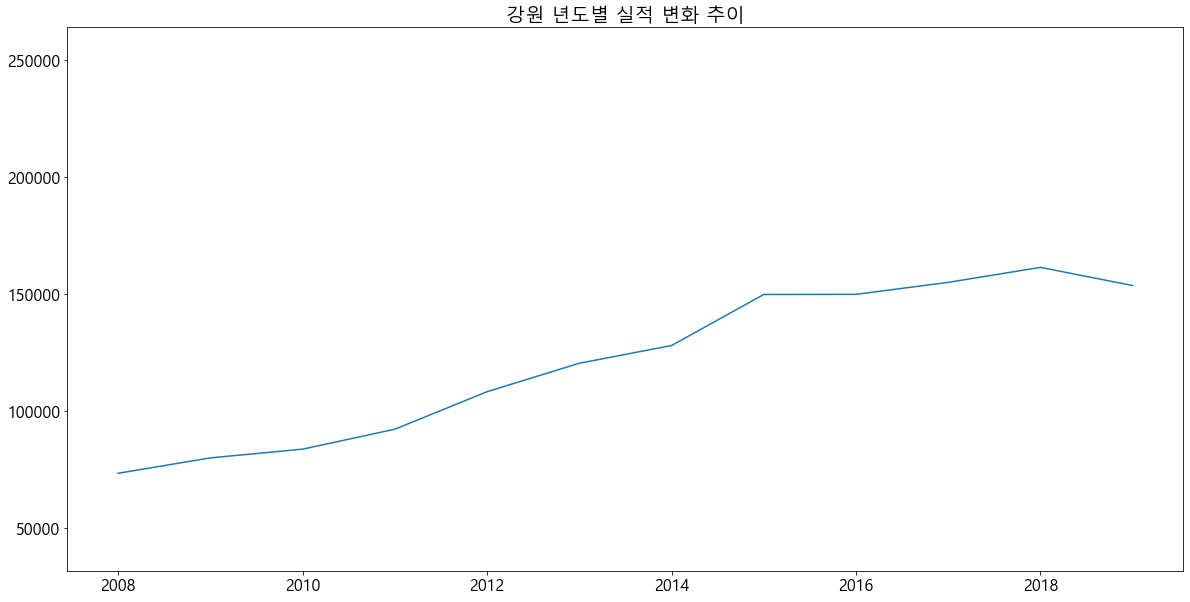

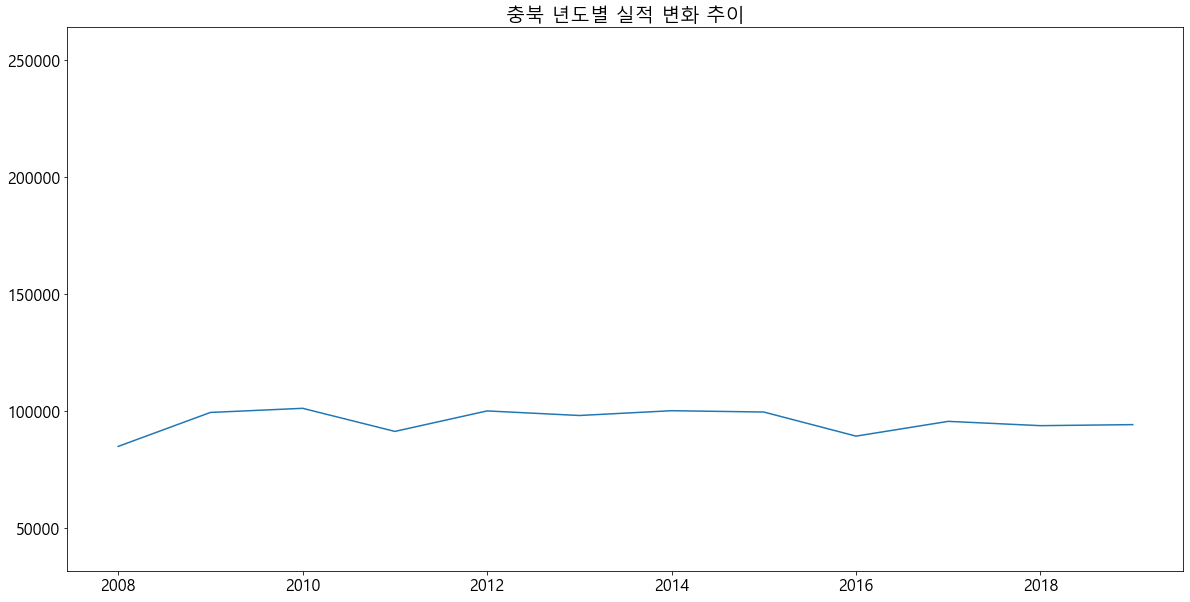

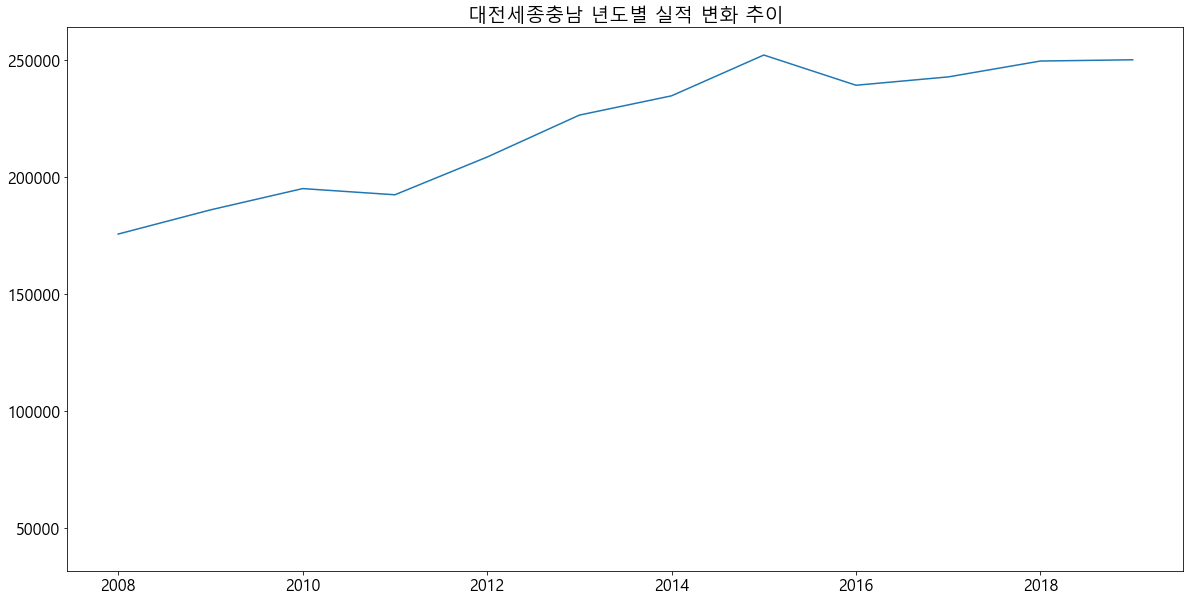

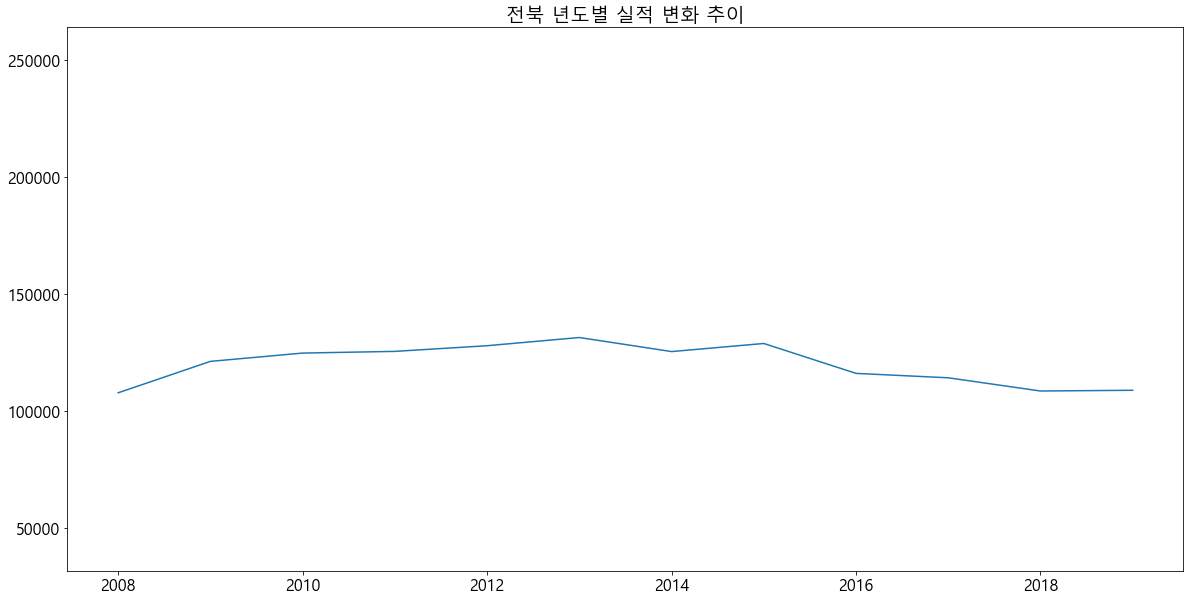

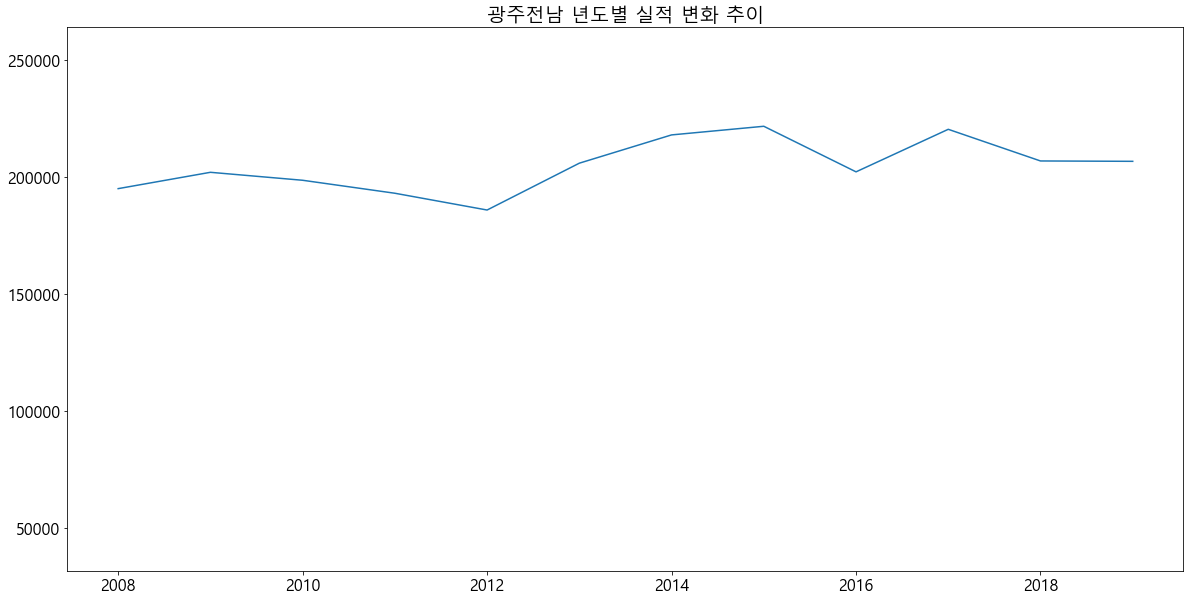

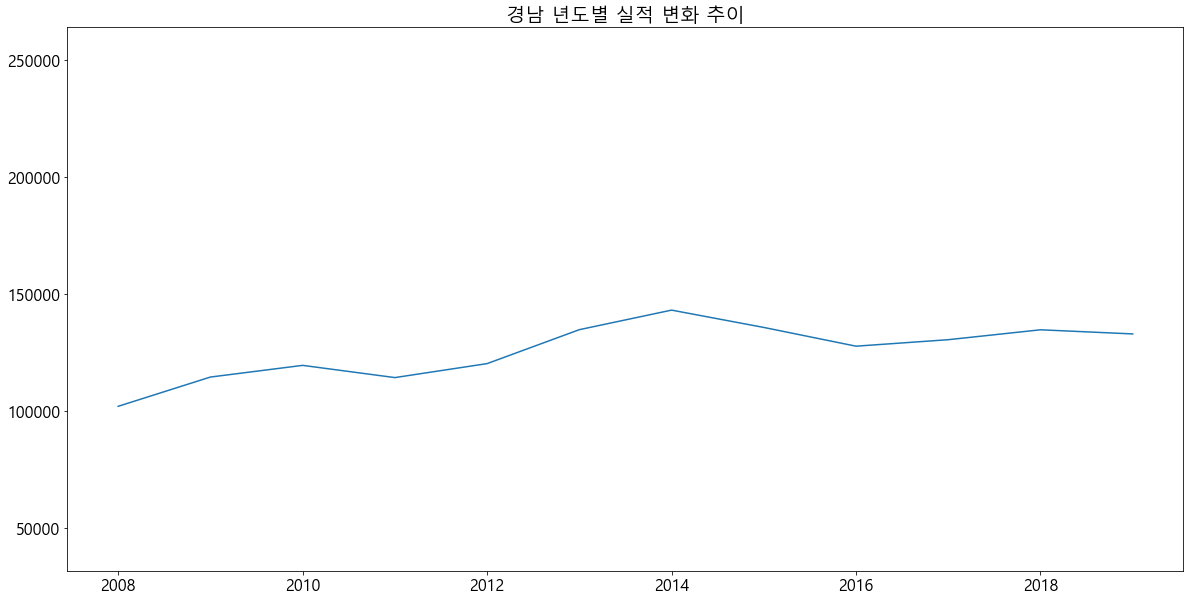

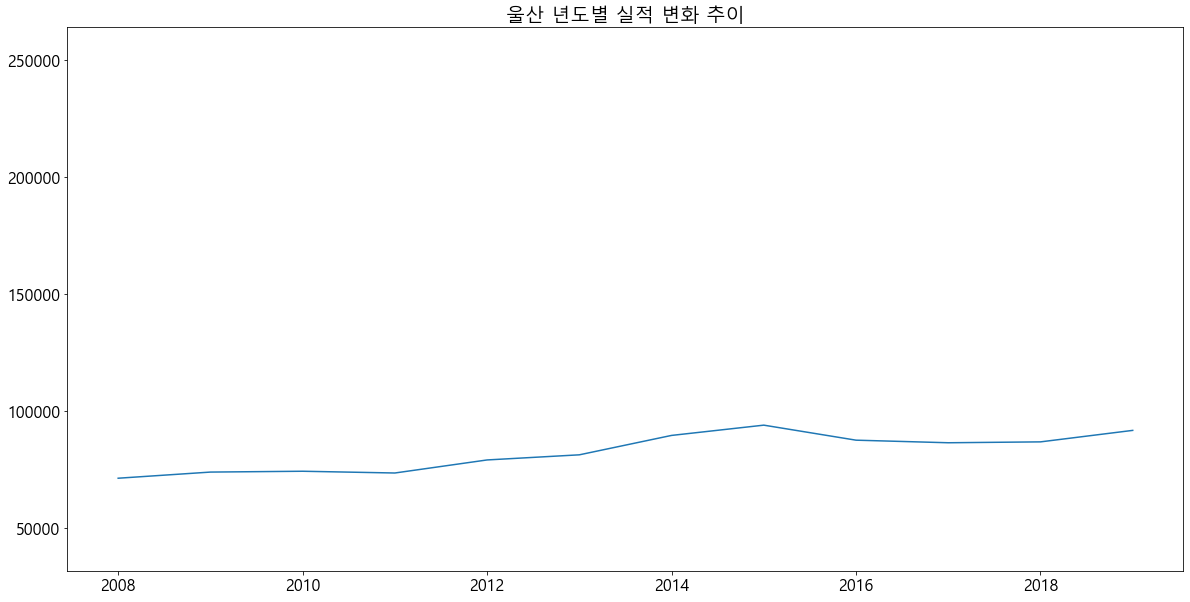

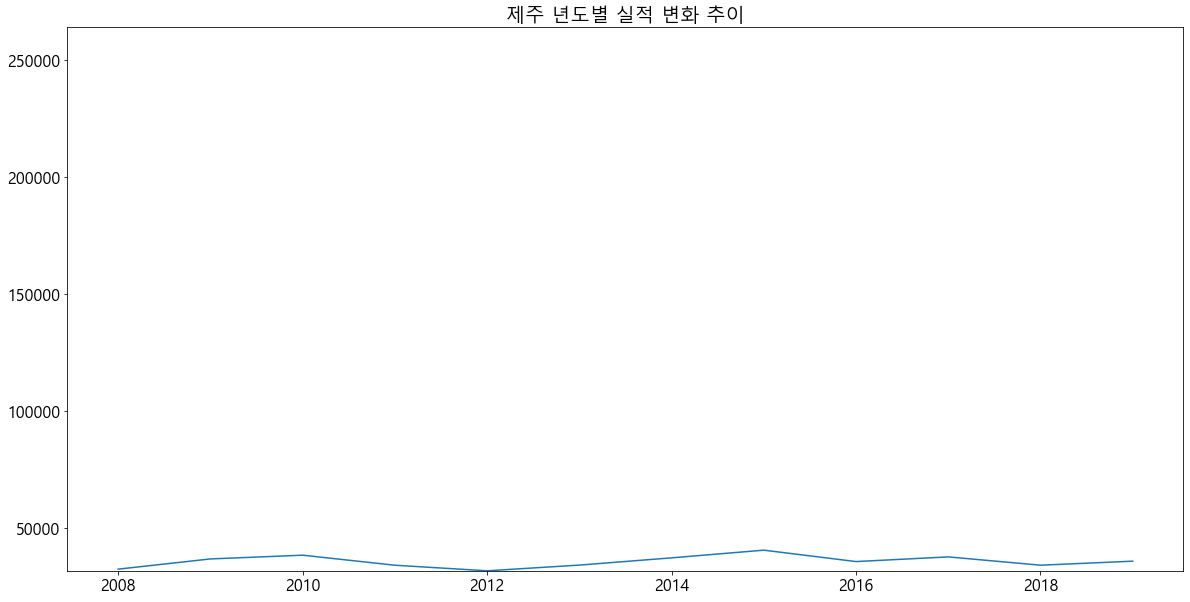

In [107]:
ylim_min = blood_local6.min().min()
ylim_max = blood_local6.max().max()

for i in blood_local6.index:
    blood_local6.T[f'{i}'].plot()
    plt.title(f'{i} 년도별 실적 변화 추이')
    plt.ylim(ylim_min,ylim_max)
    plt.show()

## 헌혈률

In [96]:
blood_local_ratio = blood_local[blood_local[1].str.contains('률|시')]
blood_local_ratio

# 시각화에 필요없는 값들 제거
blood_local_ratio2 = blood_local_ratio.drop(columns=[1,2])
# 시각화를 위해 데이터 형변환
blood_local_ratio3 = blood_local_ratio2.T.set_index(0)
blood_local_ratio3 = blood_local_ratio3.astype(float)


In [104]:
blood_local_ratio4 = blood_local_ratio3.T
blood_local_ratio4['시·도별(1)'] = blood_local_ratio4['시·도별(1)'].astype(int)
blood_local_ratio4 = blood_local_ratio4.set_index('시·도별(1)')
blood_local_ratio4

,서울,부산,대구경북,인천,경기,강원,충북,대전세종충남,전북,광주전남,경남,울산,제주
시·도별(1),,,,,,,,,,,,,
2008,8.4,6.0,3.7,4.7,1.3,5.0,5.7,5.1,6.2,6.0,3.3,6.6,6.0
2009,9.2,6.3,4.3,5.0,1.4,5.5,6.7,5.4,7.0,6.3,3.7,6.8,6.8
2010,9.5,6.8,4.3,5.8,1.4,5.8,6.8,5.6,7.3,6.2,3.8,6.8,7.0
2011,9.2,6.3,4.2,6.5,1.5,6.4,6.2,5.5,7.5,6.1,3.6,6.7,6.3
2012,9.7,6.4,4.4,6.2,1.5,7.2,6.5,5.7,7.1,5.7,3.7,7.1,5.7
2013,10.4,6.7,4.8,6.3,1.6,8.0,6.3,6.1,7.3,6.3,4.1,7.3,6.1
2014,11.0,6.9,5.2,6.5,1.7,8.5,6.4,6.2,7.0,6.7,4.4,7.9,6.4
2015,10.8,7.0,5.1,6.3,1.8,9.9,6.4,6.6,7.2,6.8,4.1,8.2,6.9
2016,10.3,6.1,4.7,5.6,1.6,9.9,5.7,6.2,6.5,6.2,3.9,7.6,6.0


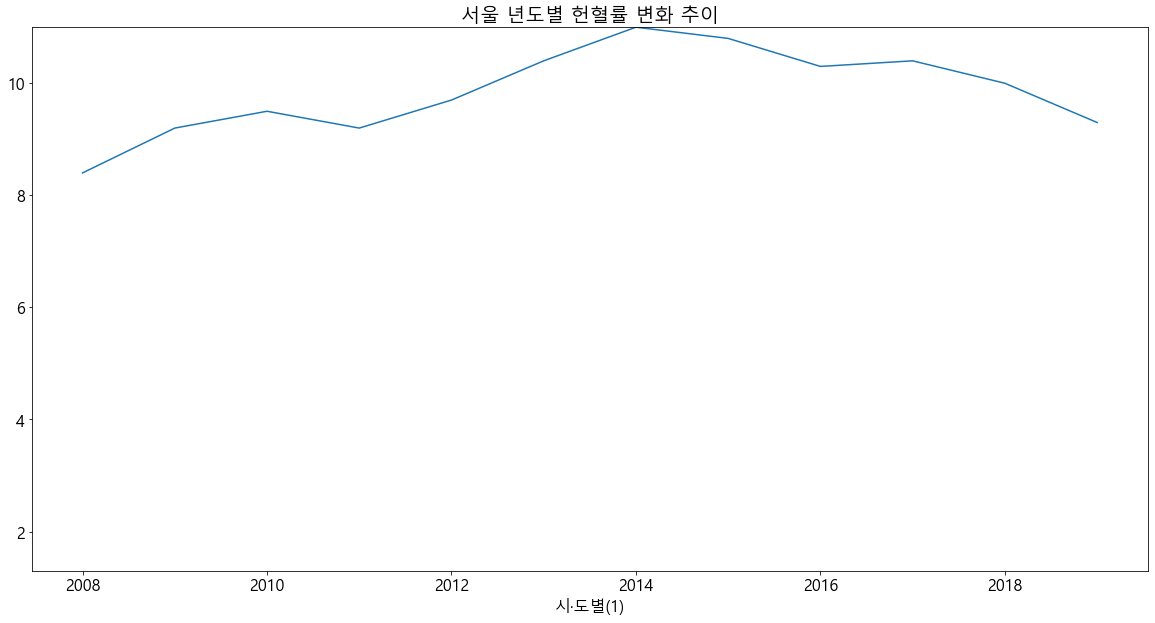

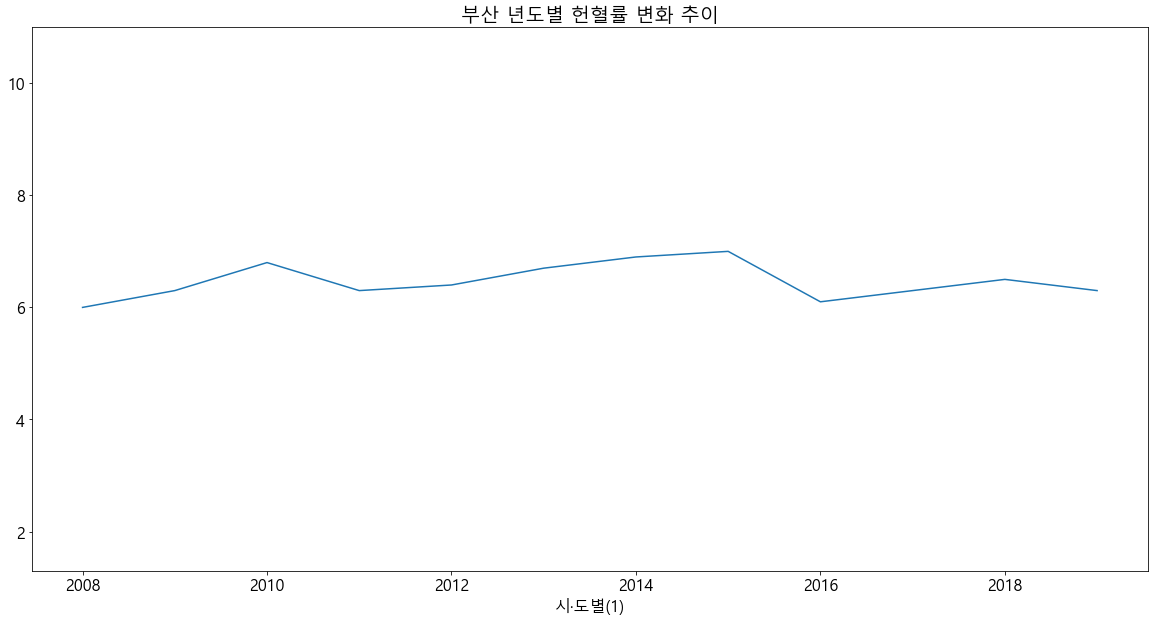

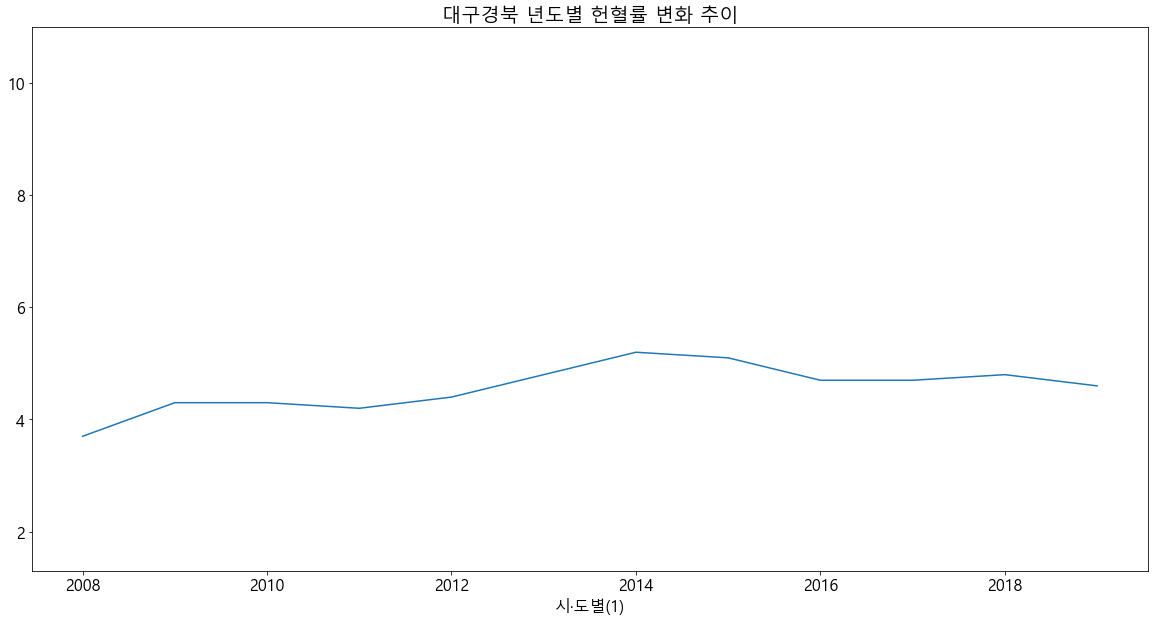

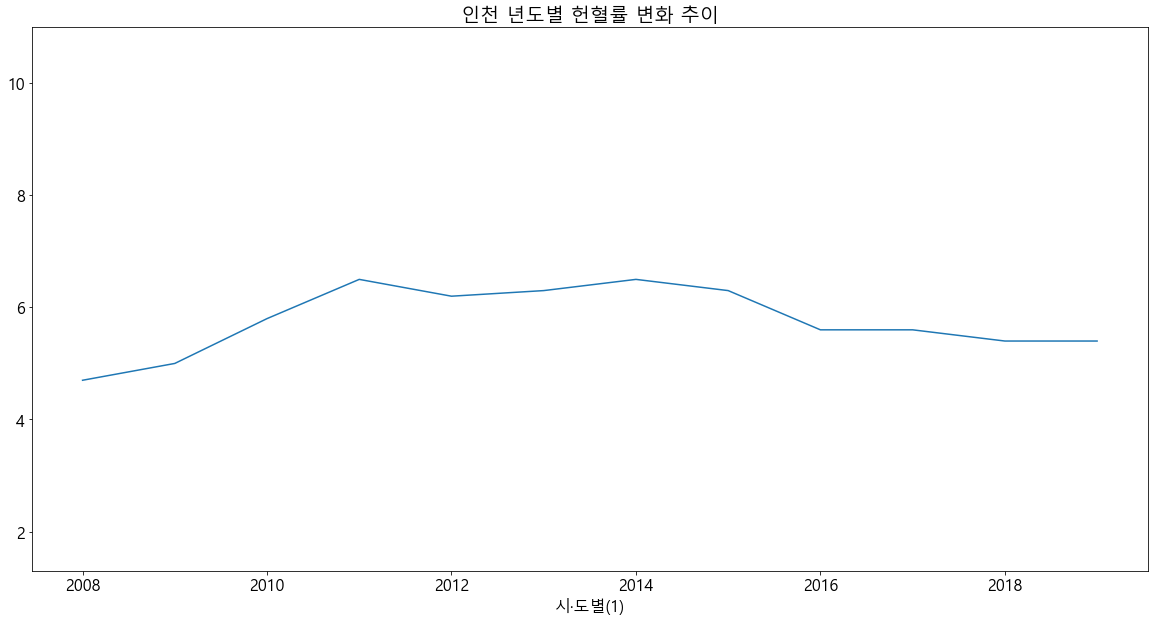

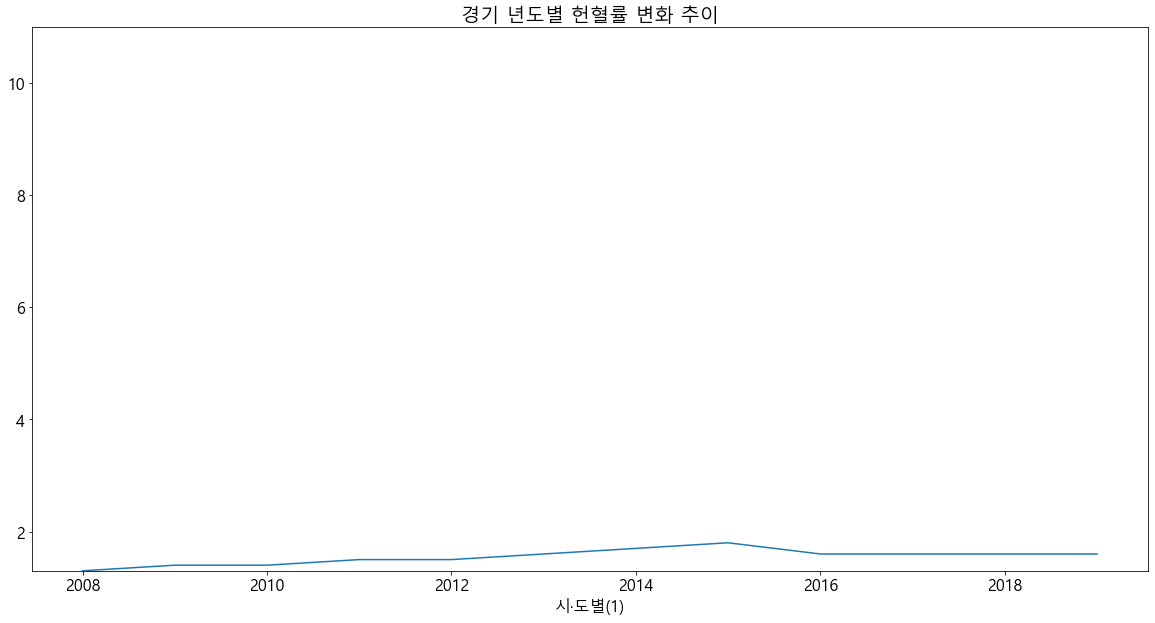

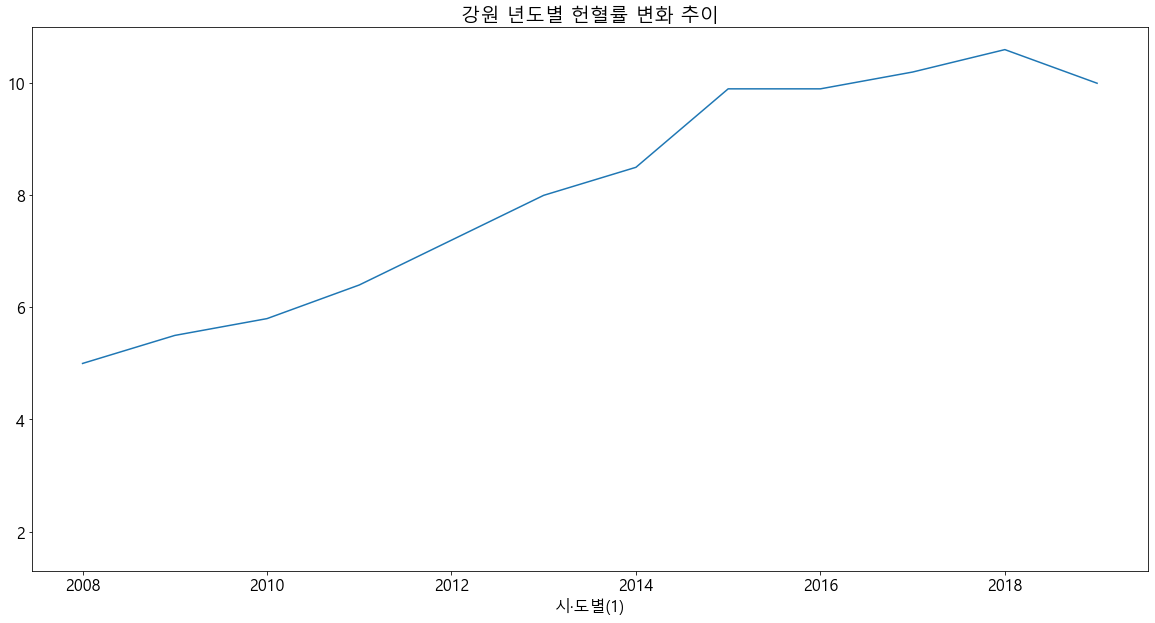

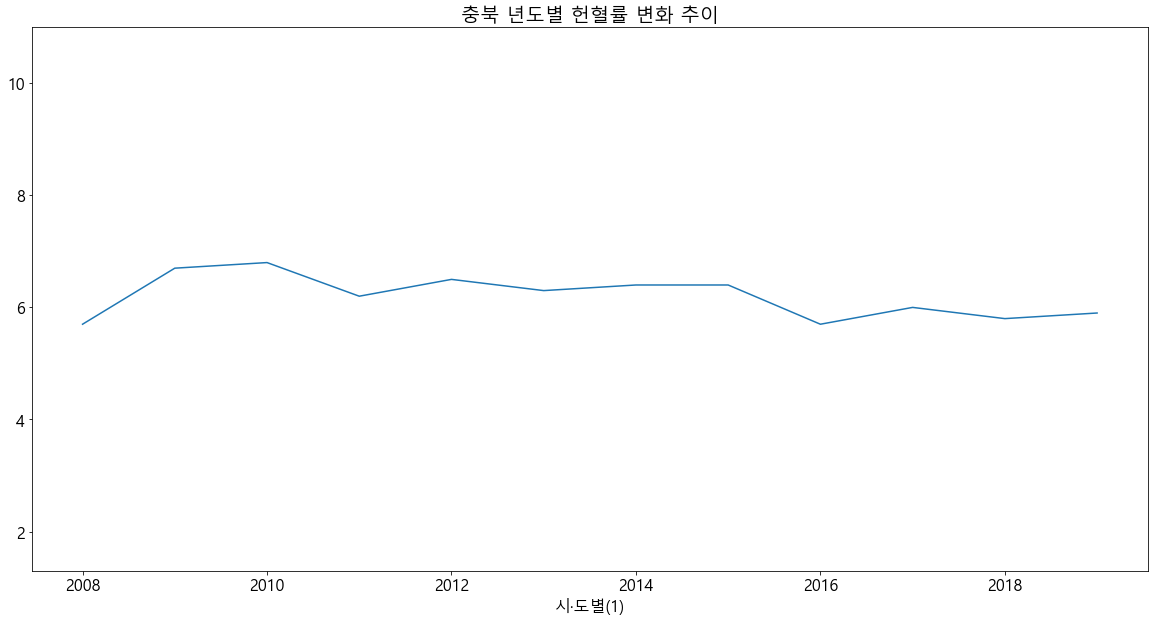

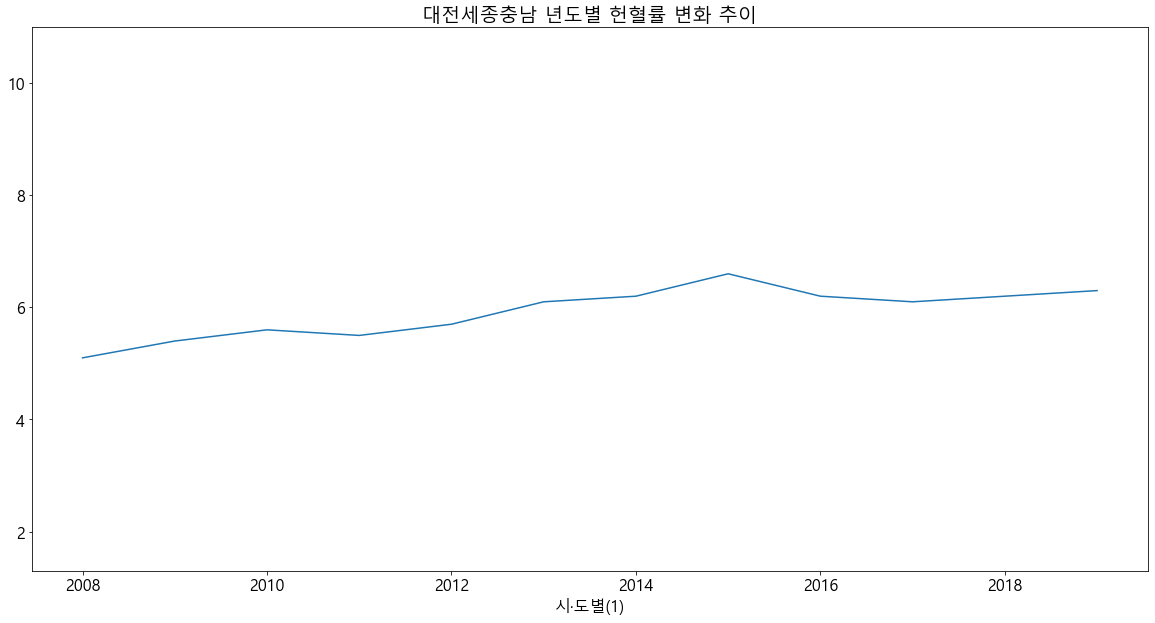

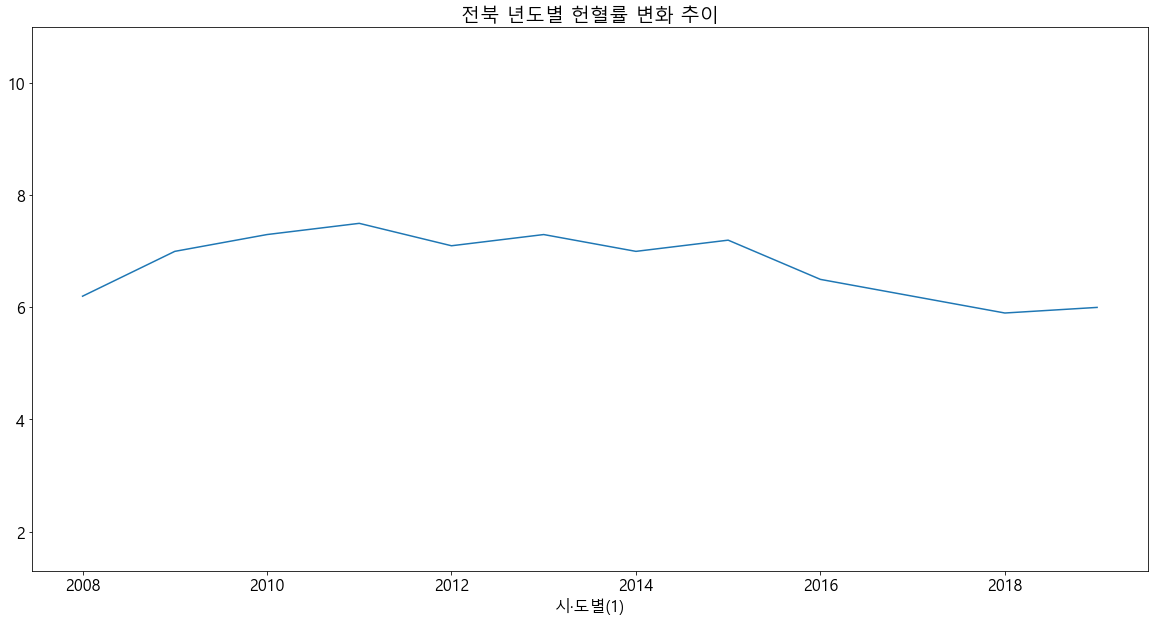

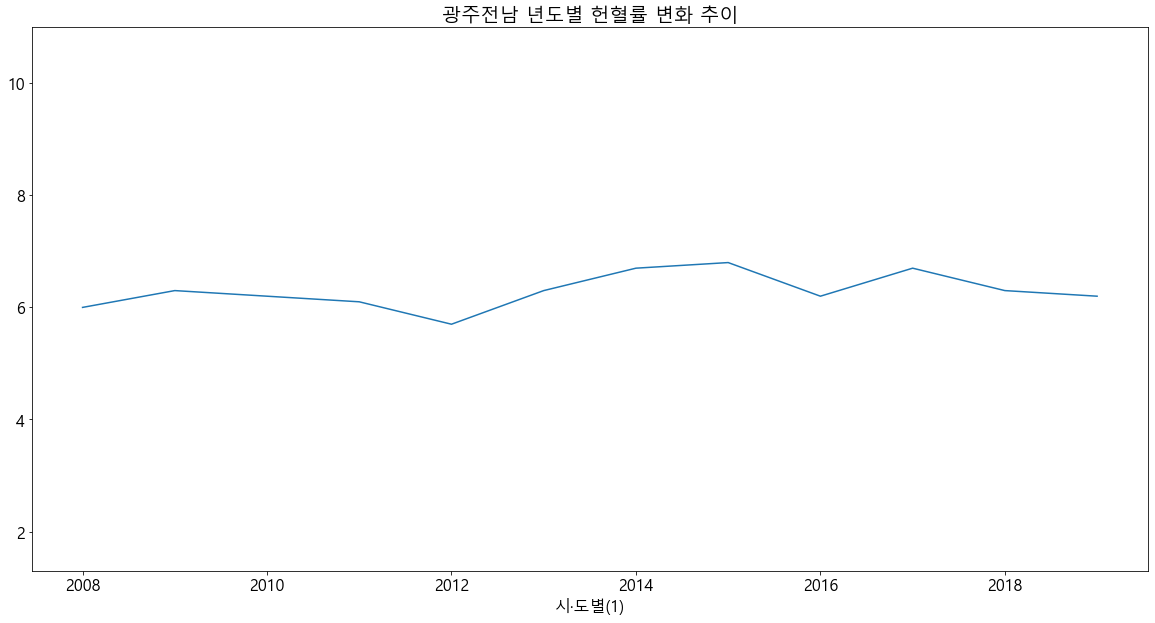

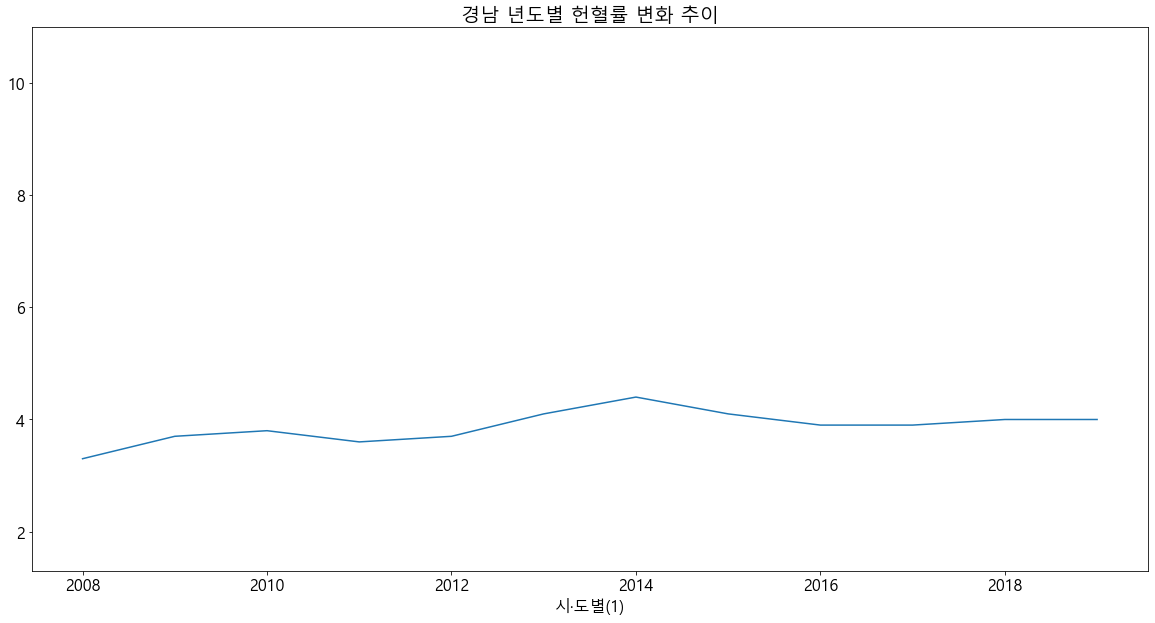

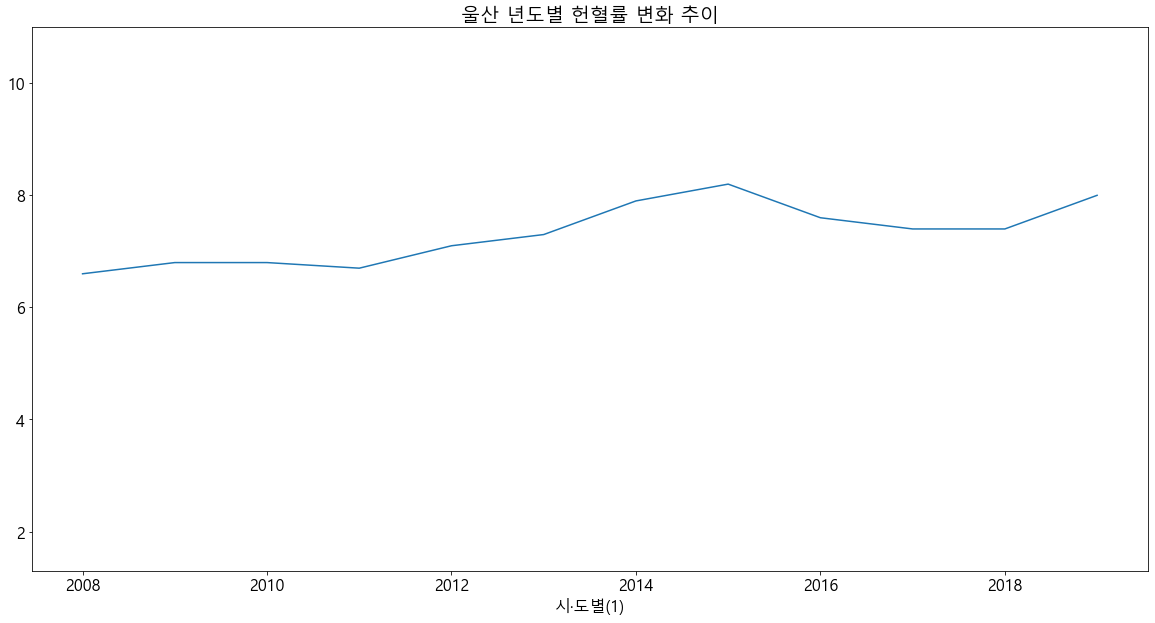

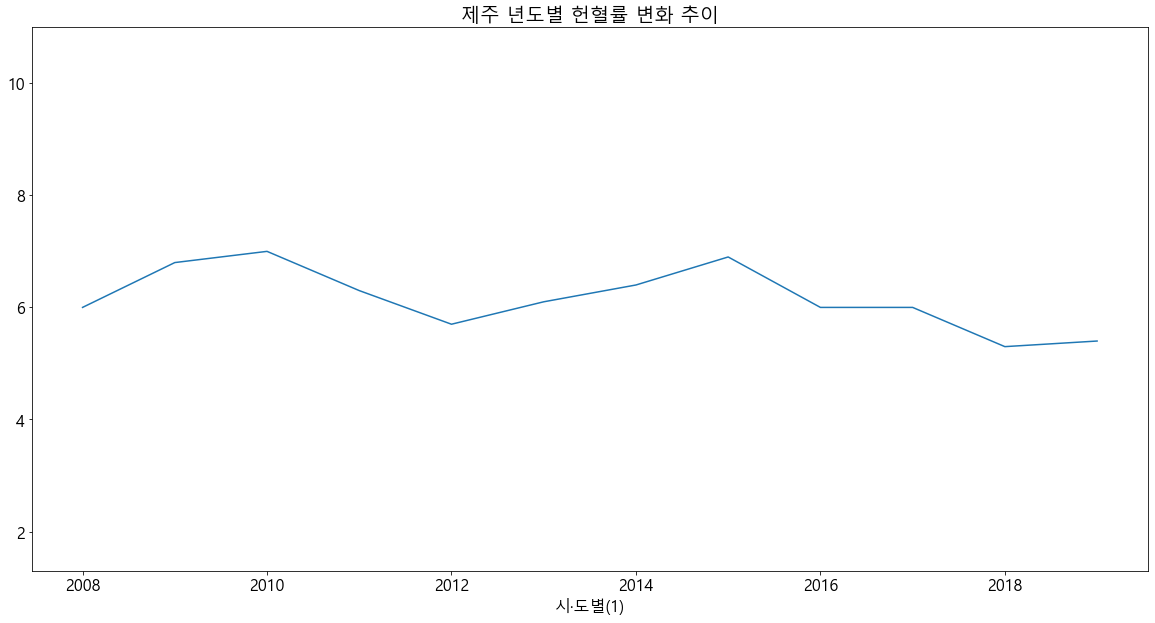

In [108]:
ylim_min = blood_local_ratio4.min().min()
ylim_max = blood_local_ratio4.max().max()

for i in blood_local_ratio4.columns:
    blood_local_ratio4[f'{i}'].plot()
    plt.title(f'{i} 년도별 헌혈률 변화 추이')
    plt.ylim(ylim_min,ylim_max)
    plt.show()